In [0]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [0]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [0]:
log_returns = np.log(1 + data.pct_change())

In [4]:
log_returns.tail()

,PG
Date,
2020-03-02,0.054397
2020-03-03,-0.011694
2020-03-04,0.052181
2020-03-05,-0.023322
2020-03-06,-0.019761


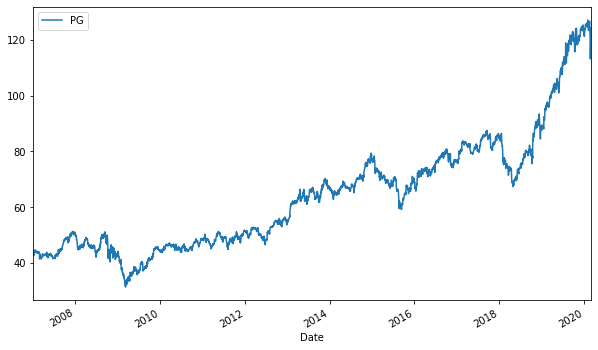

In [6]:
data.plot(figsize=(10, 6))

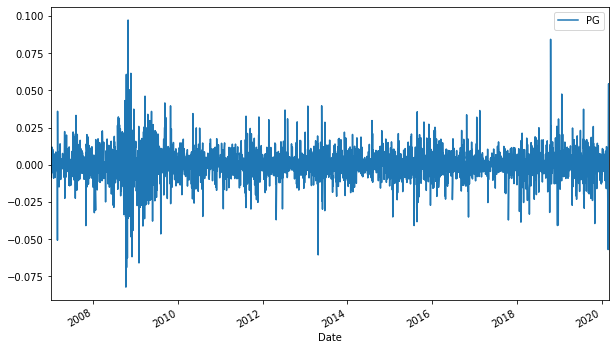

In [8]:
log_returns.plot(figsize=(10, 6))

In [7]:
u = log_returns.mean()
u

PG    0.000305
dtype: float64

In [9]:
var = log_returns.var()
var

PG    0.000122
dtype: float64

In [0]:
drift = u - (0.5 * var)

In [11]:
stdev = log_returns.std()
stdev

PG    0.011057
dtype: float64

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00024344])

In [15]:
drift.values

array([0.00024344])

In [16]:
stdev.values

array([0.01105672])

In [17]:
norm.ppf(0.95)

1.6448536269514722

In [18]:
x = np.random.rand(10, 2)
x

array([[0.59370997, 0.77834234],
       [0.49748362, 0.08999559],
       [0.68618736, 0.20770707],
       [0.3117063 , 0.01860889],
       [0.64396671, 0.74694648],
       [0.05982221, 0.0585495 ],
       [0.40902154, 0.96257862],
       [0.61816078, 0.40846253],
       [0.35968427, 0.99781783],
       [0.67460459, 0.21188537]])

In [19]:
norm.ppf(x)

array([[ 0.23709892,  0.76660683],
       [-0.00630768, -1.34078219],
       [ 0.48507198, -0.81440296],
       [-0.49101957, -2.083367  ],
       [ 0.36908203,  0.66491159],
       [-1.55626785, -1.56706715],
       [-0.23006267,  1.78142671],
       [ 0.30065388, -0.2315017 ],
       [-0.35930286,  2.85055276],
       [ 0.45266383, -0.79989655]])

In [21]:
Z = norm.ppf(np.random.rand(10, 2))
Z

array([[ 0.44979676,  0.57094677],
       [-0.80442104, -0.39656936],
       [ 0.8866288 , -1.39714486],
       [ 1.83461528,  0.62527037],
       [ 1.02542122, -1.39782799],
       [ 1.0349682 , -0.24477372],
       [-1.73378264,  0.46156777],
       [ 0.6018701 , -1.01249314],
       [ 0.39479204, -0.03622699],
       [-0.66143097,  1.25690411]])

In [0]:
t_intervals = 1000
iterations = 10

In [0]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [24]:
daily_returns

array([[0.99275788, 0.99203005, 1.00344228, ..., 0.98132297, 0.9947348 ,
        1.00257547],
       [1.01071272, 0.99231167, 1.02043375, ..., 1.00917604, 0.99726098,
        0.99290441],
       [1.00783217, 0.99971966, 1.01099066, ..., 0.99827711, 1.01470074,
        0.973978  ],
       ...,
       [1.02785321, 0.99511322, 0.98917037, ..., 0.99795783, 1.00808968,
        0.9799137 ],
       [1.00749567, 1.02032458, 1.00159637, ..., 0.9935975 , 0.97286916,
        1.00421718],
       [1.01488784, 1.01334372, 1.0092243 , ..., 0.9940194 , 0.99711934,
        1.00027938]])

In [25]:
S0 = data.iloc[0]
S0

PG    43.435204
Name: 2007-01-03 00:00:00, dtype: float64

In [26]:
price_list = np.zeros_like(daily_returns)
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [27]:
price_list[0] = S0
price_list

array([[43.43520355, 43.43520355, 43.43520355, ..., 43.43520355,
        43.43520355, 43.43520355],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
for t in range(1, t_intervals):
  price_list[t] = price_list[t-1] * daily_returns[t]

In [30]:
price_list

array([[43.43520355, 43.43520355, 43.43520355, ..., 43.43520355,
        43.43520355, 43.43520355],
       [43.90051287, 43.10125919, 44.32274774, ..., 43.83376671,
        43.31623356, 43.12700512],
       [44.24434926, 43.08917629, 44.80988407, ..., 43.75824614,
        43.95301426, 42.00475427],
       ...,
       [65.11626699, 49.56326792, 80.67531894, ..., 58.2055802 ,
        34.71447714, 39.86059422],
       [65.60435673, 50.57062075, 80.80410664, ..., 57.832919  ,
        33.77264426, 40.02869343],
       [66.58106412, 51.24542102, 81.54946804, ..., 57.48704361,
        33.67535682, 40.03987669]])

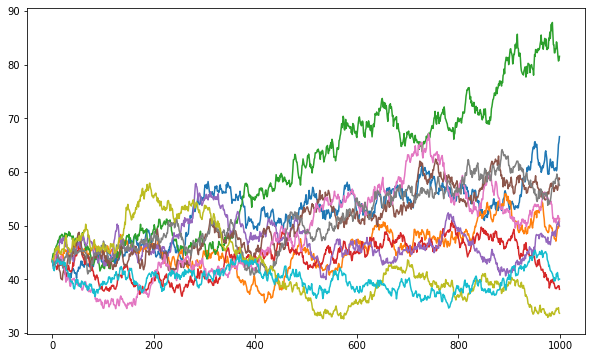

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(price_list)